1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

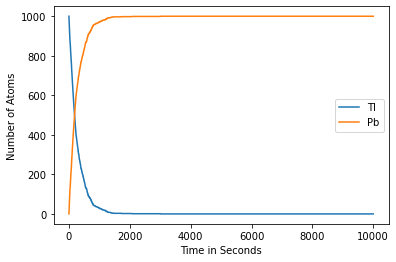

In [19]:
import numpy as np
import matplotlib.pyplot as plt
#Set the given definitions
TauInMinutes = 3.052
#Conversion of the tau into second is required
#Since we are analysing the decay of the atoms in each time step in 1 second
TauInSeconds = TauInMinutes * 60

#There are 1000 Thalium atoms at first
ThaliumAtomsSampleSize = 1000
#Control the size of the Thalium atoms
ThaliumSizeController = 1000

def probbailityTau(TauInSeconds):
    return 1 - 2**(-1 / TauInSeconds)

#In order to observe the decay of Thalium atoms lets define ThaliumDecayHistory array
ThaliumDecayHistory = []
#Since we start from 1000 Thalium atoms, append it for the first value
ThaliumDecayHistory.append(ThaliumAtomsSampleSize)
#Running time is expected more than 1000 runs
#Since the decay will done according to the probability
#Hence keep the iterarion time big enough
#Control the loop, whenever the element in the poisition hits zero
#Stop the iteration
for idx in range(9999):
    #If the Thalium atom size hits zero
    #if ThaliumDecayHistory[idx] == 0:
        #stop the iteration
        #break
    
    #In each time generate a random number sequence
    #with the last known size
    randomProbSize = np.random.uniform(size=ThaliumSizeController)
    #print(randomSize)
    
    #Iterate all over the randomSize array
    #If the outcome probability is less than the tau
    #Add it to the sum
    
    decay = sum(randomProbSize < probbailityTau(TauInSeconds))
    newThaliumSize = ThaliumSizeController - decay
    ThaliumDecayHistory.append(newThaliumSize)
    ThaliumSizeController = newThaliumSize
    
LeadAtoms = ThaliumAtomsSampleSize - np.array(ThaliumDecayHistory)
plt.plot(ThaliumDecayHistory,label="Tl")
plt.plot(LeadAtoms,label="Pb")
plt.xlabel('Time in Seconds')
plt.ylabel('Number of Atoms')
plt.legend()


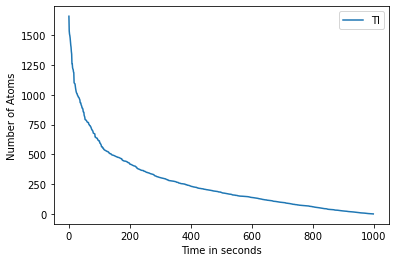

In [20]:
#Repeating the exercise by the means of inverse transform method
#Drawing 1000 random numbers

def probabilityTau(a):
    return -np.log(1-a) /(np.log(2)/TauInSeconds)

r = np.random.random(ThaliumAtomsSampleSize)
decayArray = probabilityTau(r)

plt.plot(np.sort(decayArray)[::-1],label = "Tl")
plt.xlabel('Time in seconds')
plt.ylabel('Number of Atoms')
plt.legend()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

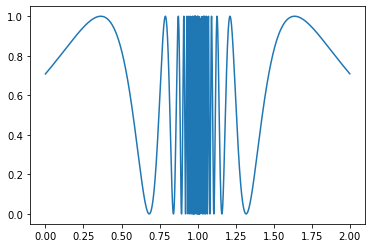

In [2]:
#Definition of the function
def f(x):
    return np.sin(1/(1-x)) ** 2

#Plotting the function
#Before each time applying the integration method, just visualize the function
#These helps to gain insight about the function's character

N = 10000
x = np.linspace(0.0001,1.999,N)
plt.plot(x,f(x))
plt.show()

In [3]:
#The are under the function is the integral I
#The all possible outcomes under the box of area is A
#The probability of a point that fall under the function is p=I/A
#If we are generating N random points, the fraction k which fall under the curve is k/N and approximate I/A
#Thus I can be approximated to (k*A)N

In [4]:
#Hit/Miss method
#Define the repetation amount, for use repeat it 60 times
IntegralRepeat = 60

#Store all the integrals in each run, will include 60 integrals
storageIntegrals = []

#In order to generate random points
#Keep it considerablt law in order to obtain the value faster
N = 100000
#Repeat the integral calculation in order to find mean and standard deviation
for i in range(0,IntegralRepeat):
    k = 0
    for i in range(0,N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random() # y is random uniform between 0 and 1
        if y < f(x): k += 1
    storageIntegrals.append(2 * k / N) #append the found integral to the integral storage

print("Mean of the Integrals: ", np.mean(storageIntegrals),"\n")

#Standard deviation of the method scales as 1/np.sqrt(N)
#N this time is 60
print("Standard Deviation of the Integrals: ",np.std(storageIntegrals) / np.sqrt(IntegralRepeat),"\n")

print("Difference between the real value: ", np.abs(1.34691 - np.mean(storageIntegrals)))



Mean of the Integrals:  1.3470090000000001 

Standard Deviation of the Integrals:  0.0003481134633037532 

Difference between the real value:  9.900000000007125e-05


In [5]:
#Repeating the integral with mean value method
#Defining the x-values => x is random uniform between 0 and 2, with N points
x = 2 * np.random.random(N)

#Calculation of the integral with Mean Value Method
#Now we are running only once with N points
meanValueMethodIntegral = 2 * np.sum(f(x)) / N

print("Integral from the Mean Value Integral Method:", meanValueMethodIntegral,"\n")
print("Mean of the Integral Value: ",np.mean(meanValueMethodIntegral),"\n")
print("Difference between the real value: ", np.abs(1.34691 - meanValueMethodIntegral),"\n")

Integral from the Mean Value Integral Method: 1.3480589924241584 

Mean of the Integral Value:  1.3480589924241584 

Difference between the real value:  0.001148992424158335 



3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [6]:
#Define how many data point you will use
N = 10000

#Compute the 2D area of circle of unit radius
k = 0 
for i in range(N):
    x = 2 * np.random.random() - 1 #x is random uniform between -1 and 1
    y = 2 * np.random.random() - 1 #y is random uniform between -1 and 1
    #Check whether the point is under the are
    #If it is increase the k value
    if(x**2 + y**2 <= 1):
        k += 1
#Calculation of the integral
#Area of the box is 4 this time
I = 4 * k / N

print("Area of the circle of unit radius:", I)       
print("Difference between the real value:", np.abs(np.pi - I))

Area of the circle of unit radius: 3.136
Difference between the real value: 0.005592653589792995


In [7]:
#Generalizing the result for 10D sphere
k = 0   
for i in range(N):
    #This tiem we are in 10D
    x = 2 * np.random.rand(10) - 1 #x is random uniform between -1 and 1
    #radius calculation
    r = np.sum(x**2)
    #If the radius under the f
    if(r <= 1):
        #increment it
        k += 1

#Area of the box is now 2^10
I = (2**10) * k / N # 
print("Area of the sphere:", I)
print("Difference between the real value", np.abs((np.pi**5)/120 - I))  

Area of the sphere: 2.8672
Difference between the real value 0.3170359601226549


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [8]:
import numpy as np

#Define the points in each integration
N = 10000
#Definition of the function
def f(x):
    return ((x ** ((-1)/2))/((np.exp(x)) + 1))

#Definition of the weight
def w(x):
    return 1/np.sqrt(x)

#Define the x values
x = np.random.random(N) ** 2  

#Repeat the integral calculation 60 times
IntegralRepeat = 50

#Keep the each run time integral in storage
storageIntegrals = []

#Generalization of the mean value method onto g(x)
for i in range(IntegralRepeat):
    I = (1 / N) * np.sum(f(x) / w(x)) * 2
    #print(I)
    storageIntegrals.append(I)
            
print("After 60 repeat we have obtained the mean value for the integrals: ", np.mean(storageIntegrals),"\n")
#We have obtained the value close to 0.84

After 60 repeat we have obtained the mean value for the integrals:  0.8411110920874754 

